In [1]:
#This tutorial will compare the various machine learning (ml) algorithms. Currently five machine learning (ML) algorithms are compared. 
# i) Random forest
# ii) Linear regression
# iii) SVM
# iv) Naive bayes
# v) kNN


In [32]:
'''
Penguin data has been used in the present example. More information (column information and details) about the 
data is available at 
    https://umap-learn.readthedocs.io/en/latest/basic_usage.html#penguin-data
    
The aim of the exercise is to predict the subspecies of the penguins based on supporting information such as sex, 
island, body mass and others. 
        
This data is highly separable; hence most of the implemented algorithms provided the best accuracy. However, you can 
always tweak the algorithm parameters to see how they behave when they change. The algorithm might give different 
results for the other dataset. Tweaking parameters and selecting the best features can always provide better accuracy.  
'''

'\nPenguin data has been used in the present example. More information (column information and details) about the \ndata is available at \n    https://umap-learn.readthedocs.io/en/latest/basic_usage.html#penguin-data\n    \nThe aim of the exercise is to predict the subspecies of the penguins based on supporting information such as sex, \nisland, body mass and others. \n        \nThis data is highly separable; hence most of the implemented algorithms provided the best accuracy. However, you can \nalways tweak the algorithm parameters to see how they behave when they change. The algorithm might give different \nresults for the other dataset. Tweaking parameters and selecting the best features can always provide better accuracy.  \n'

In [3]:
#importing the necessary pacakages
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Loading the data
df = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
df.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
#describling the basis statistics for the data.
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [33]:
'''The columns species_short, island, and sex are categorical variables. These fields need to be converted into 
an integer before beginning the machine learning. The data contains NaN; this might miss leading the model training
process hence don't forget the remove it.'''

#Converting the string labels to numbers
df['species_short_c'] = df['species_short'].map({'Adelie':1, 'Chinstrap':2, 'Gentoo':3})
df['island_c'] = df['island'].map({'Torgersen':1, 'Biscoe':2, 'Dream':3})
df['sex_c'] = df['sex'].map({'MALE':1, 'FEMALE':0})

df = df.dropna() # remove NaN from the data

In [34]:
#Separate the features and labels into X and y for machine learning.
X = df[
    [
        "island_c",
        "sex_c",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
y = df[['species_short_c']].values

In [8]:
# Basic statistics on data to see the how the features behave

c:\users\sandeep\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


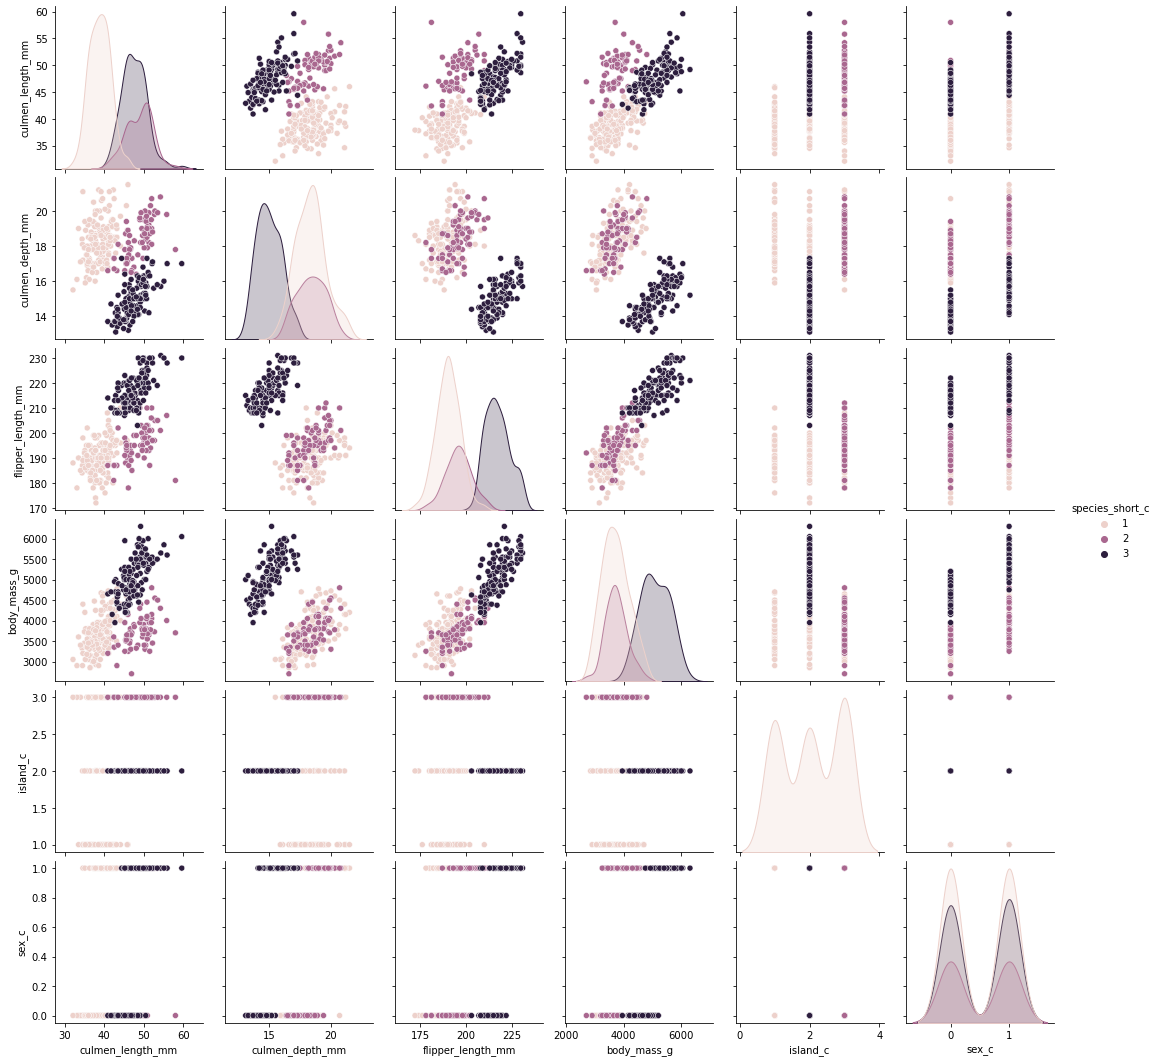

In [9]:
pair_plot = sns.pairplot(df, hue='species_short_c')

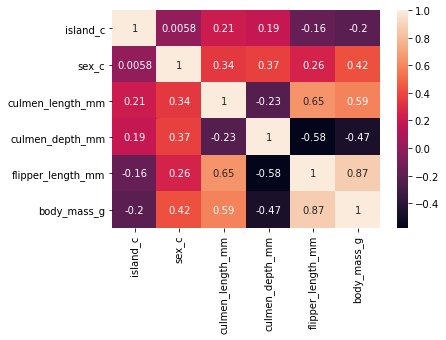

In [10]:
'''Above pair plot shows the fields such as body_mass, filpper_length, cumlen_lenght, cumlen_depth are separable in the
context of the species. This is a good sign for the ml to gain its best accuracy. Correlation plot will provide the 
correlation between each feature. In the below figure, it is clear that none of the features are correlating. Such 
data will make the ML job easy without much hassle.'''

heatmap = sns.heatmap(df['island_c sex_c culmen_length_mm culmen_depth_mm flipper_length_mm \
body_mass_g'.split()].corr(), annot=True,)

In [11]:
#splitting the data for test and training, test size indicates the size of the test data to be taken. In this case
#its worth to execute print (X_train.shape) and print(X_test.shape) for the better understaind of test and train taken.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



#You can try other scalars such as MaxAbsScaler, StandardScaler, MaxAbsScaler ...... Google for more.......
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#implementing the ML algorithms
#random forest (rf)
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train.ravel())
y_pred=classifier.predict(X_test)

#rf accuracy
rf = metrics.accuracy_score(y_test, y_pred)

In [13]:
#SVM
classifier = svm.SVC(kernel='linear') #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

#rf accuracy
sup_vec = metrics.accuracy_score(y_test, y_pred)

In [24]:
# Naive Bayes (nb)
classifier = BernoulliNB()
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

#nb accuracy
nb = metrics.accuracy_score(y_test, y_pred)

In [25]:
#kNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

knn = metrics.accuracy_score(y_test, y_pred)

In [26]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
y_pred = lr.predict(X_test)

log_regs = metrics.accuracy_score(y_test, y_pred)

In [27]:
#Plotting the accuracy of all the algorithm
lbl = ["RF", "SVM", "NB", "kNN", "LR"]
accuracy_val = [rf, sup_vec, nb, knn, log_regs]

acc_val = list(map(lambda x: x*100, accuracy_val))
acc_val = [round(a, 2) for a in acc_val]

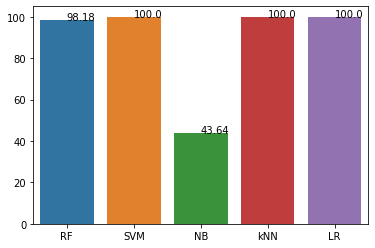

In [28]:
ax = sns.barplot(x=lbl, y=acc_val)

#adding the value label on the top of the bar plot
x_val = 0.0001
lbl_distance = 1 # distance between each label
for i in range(len(lbl)):
    ax.text(x_val, acc_val[i] , acc_val[i])
    x_val = x_val + lbl_distance

In [31]:
#Well!!! great accuray by the 4 algorithms except naive bayes
'''Let us tweak the naive bayes a bit, I will be re-writing code here. This time I am using GaussianNB instead BernoulliNB'''

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

#nb accuracy
nb = metrics.accuracy_score(y_test, y_pred)
print("accuracy%", nb*100)

accuracy% 84.54545454545455


In [ ]:
'''Well the accuracy increased to 84%!!!!!!!!. Palying with other parameters might give more accuracy.'''
